In [4]:
election <- read.csv("../Data/election_2022.csv", stringsAsFactors = F)
head(election)
library(dplyr)
library(plotrix)
options(warn = -1)

광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
서울특별시,종로구,129968,100629,46130,49172,3115
서울특별시,중구,111448,84998,38244,42906,2310
서울특별시,용산구,199077,152068,60063,85047,4374
서울특별시,성동구,252087,197240,84411,103880,5365
서울특별시,광진구,303582,235471,109922,113733,7072
서울특별시,동대문구,300928,232106,108171,112890,6416


In [2]:
election$기타 <- election[,4]-apply(election[,5:7],1,sum)
광역시도별 <- aggregate(cbind(선거인수,투표수,이재명,윤석열,심상정,기타)~광역시도,election,sum)
광역시도별$투표율 <- (광역시도별$투표수/광역시도별$선거인수)*100
광역시도별 <- arrange(광역시도별,desc(투표율))[c(1,length(광역시도별[,1])),]
광역시도별
result <- round((광역시도별[,c(7,6,5,4)]/광역시도별[,3])*100,2)
rownames(result) <- paste(c('최고 : ','최저 :'),광역시도별$광역시도)
result

,광역시도,선거인수,투표수,이재명,윤석열,심상정,기타,투표율
1,광주광역시,1209206,985492,830058,124511,14865,16058,81.49910
17,제주특별자치도,564354,409649,213130,173014,13598,9907,72.58724


,기타,심상정,윤석열,이재명
최고 : 광주광역시,1.63,1.51,12.63,84.23
최저 : 제주특별자치도,2.42,3.32,42.23,52.03


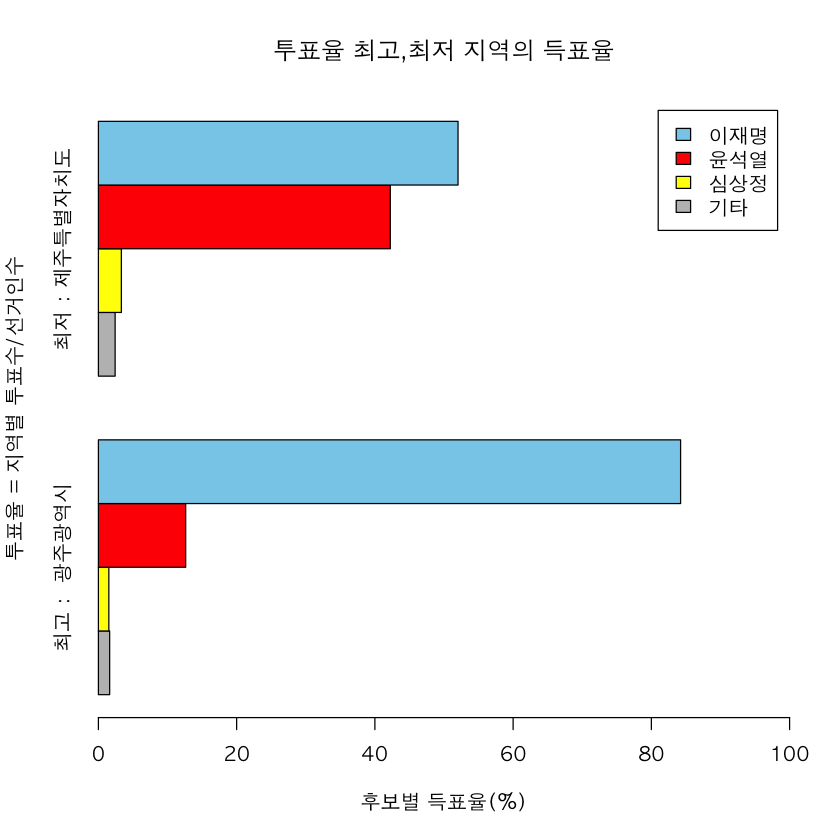

In [5]:
par(family = "AppleGothic",bg='white')
barplot(t(result),
         beside=T,
         xlab="후보별 득표율(%)",
         xlim=c(0,100),
         col=c('grey','yellow','red','skyblue'),
         main = "투표율 최고,최저 지역의 득표율",
         ylab = "투표율 = 지역별 투표수/선거인수",
         legend.text=T,
         horiz=T
        )